In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def gradient_descent(data_train, data_val, lr=0.001, ep=0.0001, max_iter=10000):
    X_train, y_train = data_train
    X_val, y_val = data_val

    converged = False
    count_iter = 0
    w0 = np.random.rand(1)
    w1 = np.random.rand(1)
    n_train = len(y_train)
    n_val = len(y_val)

    J_train = (1 / (2 * n_train)) * sum(
        [(w0 + w1 * X_train[i] - y_train[i]) ** 2 for i in range(n_train)])
    J_val = (1 / (2 * n_val)) * sum([(w0 + w1 * X_val[i] - y_val[i]) ** 2 for i in range(n_val)])

    cost_train = [J_train[0]]
    cost_val = [J_val[0]]

    while not converged:
        grad_w0 = (1 / n_train) * sum([(w0 + w1 * X_train[i] - y_train[i]) * 1 for i in range(n_train)])
        grad_w1 = (1 / n_train) * sum([(w0 + w1 * X_train[i] - y_train[i]) * X_train[i] for i in range(n_train)])

        w0 = w0 - lr * grad_w0
        w1 = w1 - lr * grad_w1

        err_train = (1 / (2 * n_train)) * sum([(w0 + w1 * X_train[i] - y_train[i]) ** 2 for i in range(n_train)])

        if abs(J_train - err_train) < ep:
            print(f"Converged successfully in iter: {count_iter}")
            converged = True
        if count_iter == max_iter:
            converged = True

        J_train = err_train[0]

        if count_iter % 50 == 0:
            cost_train.append(J_train)

            err_val = (1 / (2 * n_val)) * sum([(w0 + w1 * X_val[i] - y_val[i]) ** 2 for i in range(n_val)])
            J_val = err_val[0]
            cost_val.append(J_val)
            print(f"iter: {count_iter}, cost_train: {J_train}, cost_val: {J_val}")

        count_iter += 1
    return w0, w1, cost_train, cost_val

In [ ]:
df_train = pd.read_csv('train_function.csv')

N = len(df_train.index)
data = df_train[['X', 'y']].to_numpy()

train_size = 0.8

X_train, y_train = data[:int(train_size*N)][:, 0], data[:int(train_size*N)][:, 1]
X_val, y_val = data[int(train_size*N):][:, 0], data[int(train_size*N):][:, 1]

mean_y = np.mean(y_train)
mean_X = np.mean(X_train)
std_y = np.std(y_train)
std_X = np.std(X_train)

X_train = (X_train - mean_X) / std_X
y_train = (y_train - mean_y) / std_y

X_val = (X_val - mean_X) / std_X
y_val = (y_val - mean_y) / std_y

data_train = (X_train, y_train)
data_val = (X_val, y_val)

w0, w1, C_train, C_val = gradient_descent(data_train, data_val, lr=0.01, ep=1e-6, max_iter=50000)
print(f"w0: {w0[0]}, w1: {w1[0]}")

iter: 0, cost_train: 0.8677920546321615, cost_val: 0.640662552902405
iter: 50, cost_train: 0.32739599136556835, cost_val: 0.2588504613449528
iter: 100, cost_train: 0.12959355511326093, cost_val: 0.11402966308519075
iter: 150, cost_train: 0.057191466262280256, cost_val: 0.057956075703060266
iter: 200, cost_train: 0.03068996016708335, cost_val: 0.03557729326161715
iter: 250, cost_train: 0.020989551843791615, cost_val: 0.026264232120174615
iter: 300, cost_train: 0.017438888673910857, cost_val: 0.022176713419843383
iter: 350, cost_train: 0.01613923112076677, cost_val: 0.020269969801161733
iter: 400, cost_train: 0.01566351442373601, cost_val: 0.019323636833990333
iter: 450, cost_train: 0.015489386727339075, cost_val: 0.018826962957884906
Converged successfully in iter: 486
w0: 0.00664730474866719, w1: 0.9771880603925455


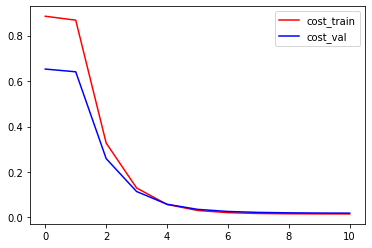

In [ ]:
plt.plot(C_train, 'r', label='cost_train')
plt.plot(C_val, 'b', label='cost_val')
plt.legend()
plt.show()

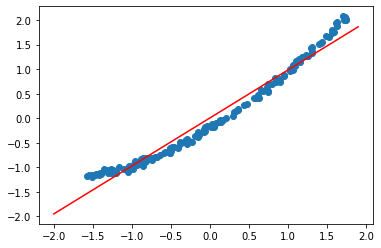

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(np.arange(-2,2,0.1), [(w0 + w1 * x)[0] for x in np.arange(-2,2,0.1)], 'r')
plt.show()

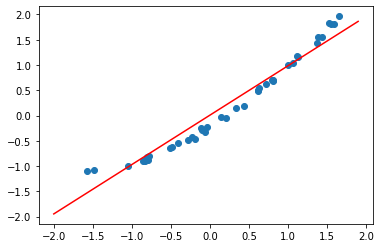

In [ ]:
plt.scatter(X_val, y_val)
plt.plot(np.arange(-2,2,0.1), [(w0 + w1 * x)[0] for x in np.arange(-2,2,0.1)], 'r')
plt.show()

In [ ]:
df_test= pd.read_csv('test_function.csv')
data_test = df_test[['X','y']].to_numpy()
X_test, y_test = data_test[:,0], data_test[:,1]

X_test = (X_test - mean_X)/std_X
y_pred = w0 + w1*X_test
y_pred = y_pred*std_y + mean_y

In [ ]:
y_pred

array([1627.87960435, 5641.27444191, 2899.45024595, 1389.46010905,
       8621.51813317, 3217.34290635, 6118.11343251, 1071.56744864,
       5124.69886876, 7985.73281237, -160.26661041, 7469.15723922,
       7548.63040432, 5760.48418956, 4926.01595601, 3773.65506205,
       7667.84015197, 1866.29909965, 8144.67914257, 5919.43051976,
       2502.08442045, 8462.57180297,  594.72845804, 6157.85001506,
       1270.25036139, 2541.821003  ,  316.57238019, -756.31534866,
       6277.05976271, 3257.0794889 , -478.15927081, 7787.04989962,
       3813.3916446 , 6078.37684996, 5561.80127681, 2859.7136634 ,
       7469.15723922,  475.51871039,  396.04554529, 2819.97708085])

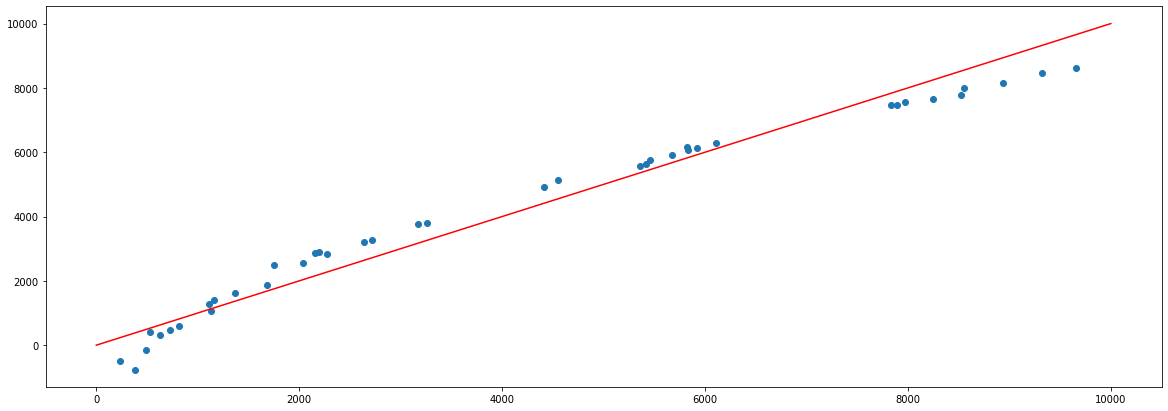

In [ ]:
plt.figure(figsize=(20,7))
plt.scatter(y_test, y_pred)
plt.plot(np.arange(10000),np.arange(10000) ,'r')
plt.show()

In [ ]:
n_test = len(y_test)
MAE = (1/n_test)*sum([abs(y_pred[i] - y_test[i]) for i in range(n_test)])
MSE = (1/n_test)*sum([(y_pred[i] - y_test[i])**2 for i in range(n_test)])
RMSE = np.sqrt(MSE)

print(f'RSME: {RMSE}, MAE: {MAE}')

RSME: 530.0279072311017, MAE: 464.2447147802449
